In [1]:
# importing libraries  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Flyzy Flight Cancellation - Preprocessed.csv')

In [3]:
df.head()

,Unnamed: 0,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [4]:
target = 'Flight_Cancelled'
X = df.drop(columns=[target])
y = df[target]

In [5]:
# Preprocessing: handle categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [6]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [7]:
# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

results = {}

In [18]:
# Build and evaluate models
for model_name, model in models.items():
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
      # Predict on test data
    y_pred = pipeline.predict(X_test)
    
     # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'roc_auc': roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    }

In [19]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print(results_df)

               accuracy  precision   recall  f1-score   roc_auc
Decision Tree     0.955   0.955189  0.98063  0.967742  0.939513
Random Forest     0.985   0.997537  0.98063  0.989011  0.989428


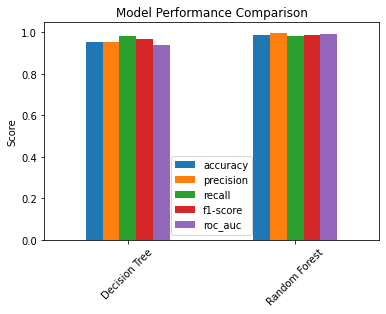

In [20]:
# Visualize results
results_df[['accuracy', 'precision', 'recall', 'f1-score', 'roc_auc']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

##### DECISION TREE

A clear picture of the decision-making process based on feature values is given by the plot. It displays the characteristics that have the biggest impact on flight cancellations, with divisions depending on thresholds that represent important decision points. This openness can aid in the comprehension of the logic of the model by stakeholders.

##### Random Forest

Random Forest reduces the overfitting risk that single Decision Trees usually have by averaging the outputs of multiple trees. By using an ensemble approach, predictions become more reliable and show better generalisation abilities on untested data.